# Analysis and predict topic

## Research question
- Can we predict topic from an article

## 1. Data Cleaning

Data Filtering:
- Text Processing: Remove stopwords, lemmatize words to their base form, and eliminate special characters, currency symbols, and numbers.
- Remove Duplicate Data

In [3]:
import pandas as pd

pd.read_csv("bbc_cleaned.csv").head(10)

,text,topic
0,dallaglio man end controversy lawrence dallagl...,sport
1,best person legal job best person job appoint ...,politics
2,viewers able shape tv imagine edit titanic wat...,tech
3,fox attack blair tory lie tony blair lie take ...,politics
4,microsoft debut security tool microsoft releas...,tech
5,dollar hit new low versus euro dollar continue...,business
6,kennedy make address charles kennedy set addre...,politics
7,chepkemei join edinburgh line-up susan chepkem...,sport
8,seek new rule justice department try overturn ...,business
9,tories pledge free sport lessons children offe...,politics


## 2. Data Exploration

2.1 Factorization

In [48]:
data['topic_id'] = data['topic'].factorize()[0]

topic_id_df = data[['topic', 'topic_id']].drop_duplicates().sort_values('topic_id')
topic_to_id = dict(topic_id_df.values)
id_to_topic = dict(topic_id_df[['topic_id', 'topic']].values)

print(topic_id_df)
print(topic_to_id)
print(id_to_topic)  

            topic  topic_id
0           sport         0
1        politics         1
2            tech         2
5        business         3
18  entertainment         4
{'sport': 0, 'politics': 1, 'tech': 2, 'business': 3, 'entertainment': 4}
{0: 'sport', 1: 'politics', 2: 'tech', 3: 'business', 4: 'entertainment'}


Distribution of Data

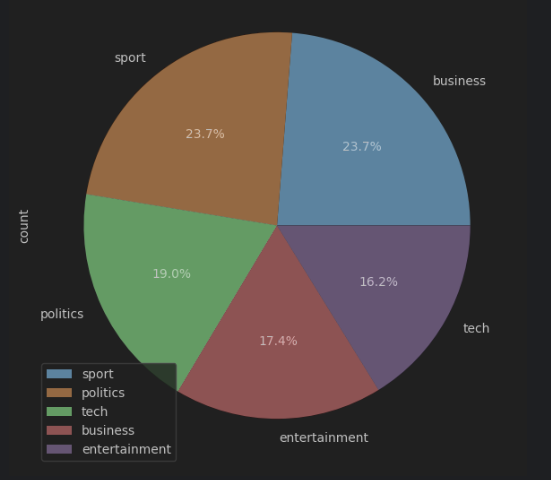

In [3]:
from IPython.display import Image

Image("DistributionOfData.png")

The Impact of Balanced Data Distribution on Model Training

- The balanced distribution of data across topics (ranging from 16% to 23% for each topic) has a positive impact on the model training process in a multi-class classification problem. When the data is evenly distributed among classes, the model is less likely to become biased toward any specific class. This ensures that it learns to predict all classes with relatively equal accuracy.

- Balanced data also simplifies the training process, as techniques like oversampling, undersampling, or adjusting class weights to address class imbalance are not required. Furthermore, the model has a more stable gradient descent during optimization, as no single class dominates the loss function. Metrics such as precision, recall, and F1-score are likely to be more balanced across all classes.

2.2 Word Cloud

Word Cloud by Topic

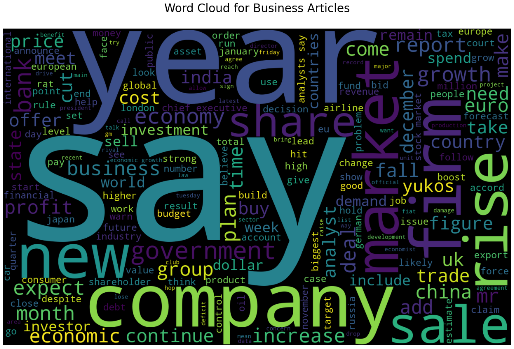

In [5]:
Image("WordCloudBusiness.png")

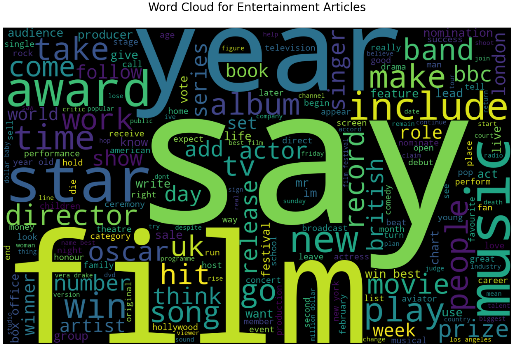

In [6]:
Image("WordCloudEntertainment.png")

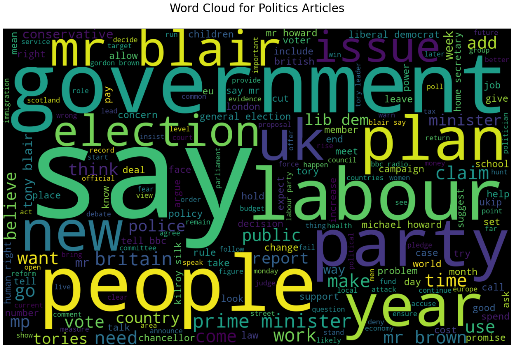

In [7]:
Image("WordCloudPolitics.png")

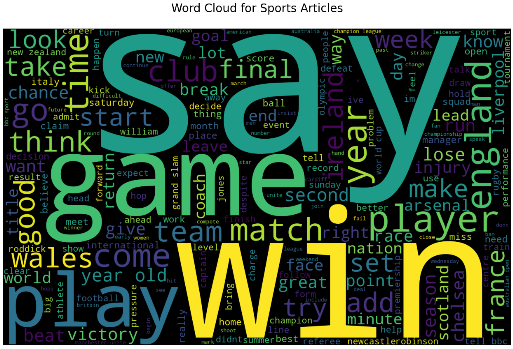

In [8]:
Image("WordCloudSports.png")

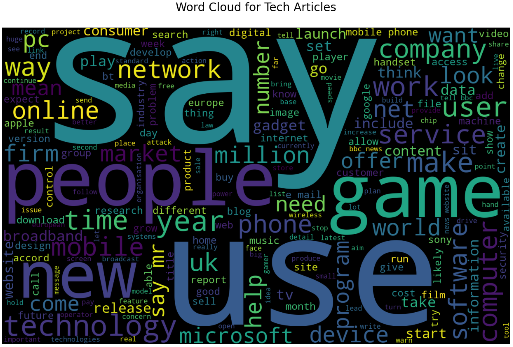

In [9]:
Image("WordCloudTech.png")

From all of the above word clouds, we make the following observations -
* The word **say** is very frequent in each of the articles In fact it is most frequent in almost every topic of article.
* For **tech** related articles, the words like ***people, technology, computer, software*** are frequent.
* For **business** related articles, the words like ***market, growth, company, firm*** are frequent.
* For **sport** related articles, the words like ***game, match, player, team, win*** are frequent.
* For **entertainment** related articles, the words like ***film, show, music, award, band*** are frequent.
* For **politics** related articles, the words like ***people, plan, labour, government*** are frequent.

One thing that might worry us is that the word said is too prevalent in the entire dataset and could lead to some sort of bias. We can be pretty certain that there might not be the case. Why? Because the word is just too prevalent and hence a poor separator of our data. We will verify this in the next step when we will take a look at some of the most relevant words/terms to each of our categories.

What we will be doing is using chi-squared test to identify the 2 unigrams and bigrams each that are most relevant to each of the categories. For conducting a chi-squared test, we will need to vectorize our text data first so let's get to it.

2.3 Feature Engineering

In text analytics, **feature engineering** involves converting text into numerical features for algorithms. One common method is **TF-IDF Vectorization**, which assigns weights to terms based on their importance:

- **TF (Term Frequency)**: Measures how often a term appears in a document:


$$
TF = \frac{\text{Number of times the term appears in the document}}{\text{Total number of words in the document}}
$$

- **IDF (Inverse Document Frequency)**: Measures how important a term is across the corpus, balancing common and rare terms:

$$
IDF = \ln\left(\frac{\text{Total number of documents}}{\text{Number of documents containing the term}}\right)
$$

- **TF-IDF**: Calculated by multiplying TF and IDF, it helps weigh terms effectively in the dataset:

$$
TF\text{-}IDF = TF \times IDF
$$

In Python, the **scikit-learn** library provides the **TfidfVectorizer** class to compute TF-IDF vectors for documents.

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(data['text']).toarray()
labels = data.topic_id
print(features.shape) 

(2118, 12542)


### Chi-Squared Formula

The chi-squared statistic is calculated as:

$$
\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}
$$

$$
\text{Where:}
$$

$$
O_i \text{ is the observed frequency.}
$$

$$
E_i \text{ is the expected frequency.}
$$

In [ ]:
from sklearn.feature_selection import chi2  # Import chi-squared test
import numpy as np 
N = 5  # Set the number of top features to display

# Loop through each topic and calculate chi-squared scores
for topic, topic_id in sorted(topic_to_id.items()):
    features_chi2 = chi2(features, labels == topic_id)  # Calculate chi-squared values
    indices = np.argsort(features_chi2[0])  # Sort features by chi-squared values
    feature_names = np.array(tfidf.get_feature_names_out())[indices]  # Get feature names
    
    # Separate unigrams (single words) and bigrams (two words)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    # Print the most correlated unigrams and bigrams for the current topic
    print("# '{}':".format(topic))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


# 'business':
  . Most correlated unigrams:
       . profit
       . economy
       . oil
       . growth
       . bank
  . Most correlated bigrams:
       . chief executive
       . oil price
       . economic growth
       . stock market
       . analysts say
# 'entertainment':
  . Most correlated unigrams:
       . singer
       . actor
       . star
       . award
       . film
  . Most correlated bigrams:
       . best film
       . los angeles
       . film festival
       . win best
       . box office
# 'politics':
  . Most correlated unigrams:
       . tory
       . party
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . michael howard
       . prime minister
       . general election
       . tony blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . injury
       . champion
       . match
       . coach
       . cup
  . Most correlated bigrams:
       . world cup
       . year old
       . champion league
       . aust

> * Going through the features above, we can see that almost all of them make a lot of sense. 
> * Also, no mentions of the word **"say"** as discussed above.

These result are consistent with what we would expect from a news outlet. We also notice that the addition of bigrams is welcome since it catches pairs of words that only make sense when put together (economic growth, box office, ...). Simply using this correlation factor to predict which class is the most likely might already get us quite far, but we will see that there are simpler and more efficient ways to do this.

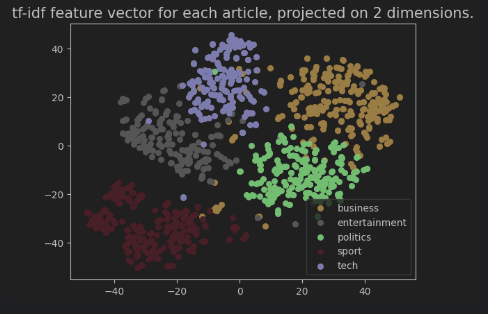

In [10]:
Image("tf-idf.png")

## 3. Machine Learning

- Logistic Regression
- Random Forest
- Naive Bayes
- SVC

- Train and evaluate on the validation set.

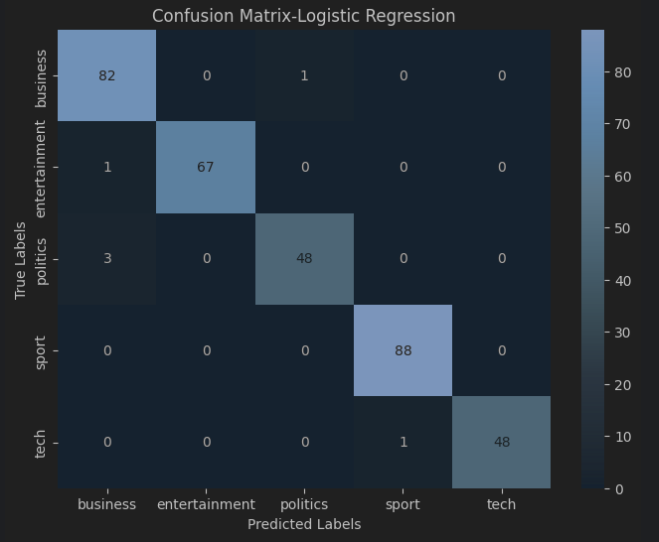

In [14]:
Image("LogisticRegression.png")

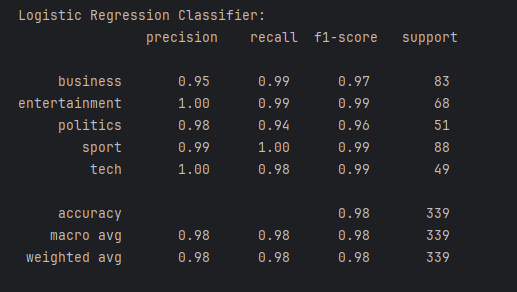

In [15]:
Image("LogisticRegressionResult.png")

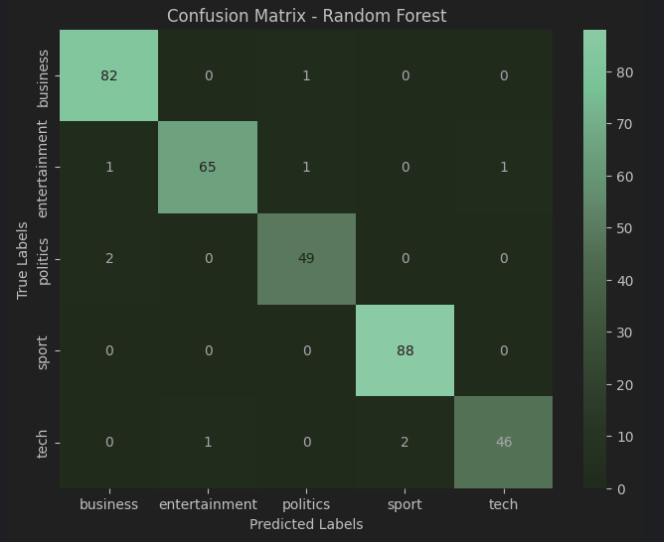

In [16]:
Image("RandomForest.png")

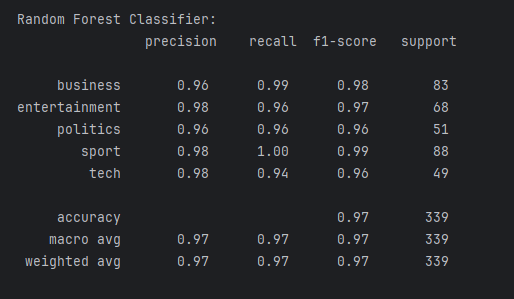

In [17]:
Image("RandomForestResult.png")

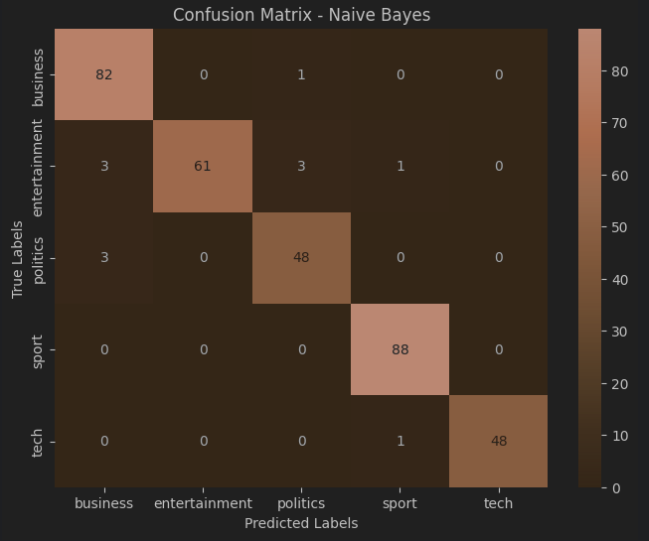

In [18]:
Image("NaiveBayes.png")

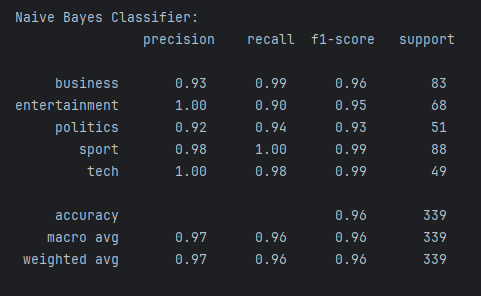

In [19]:
Image("NaiveBayesResult.png")

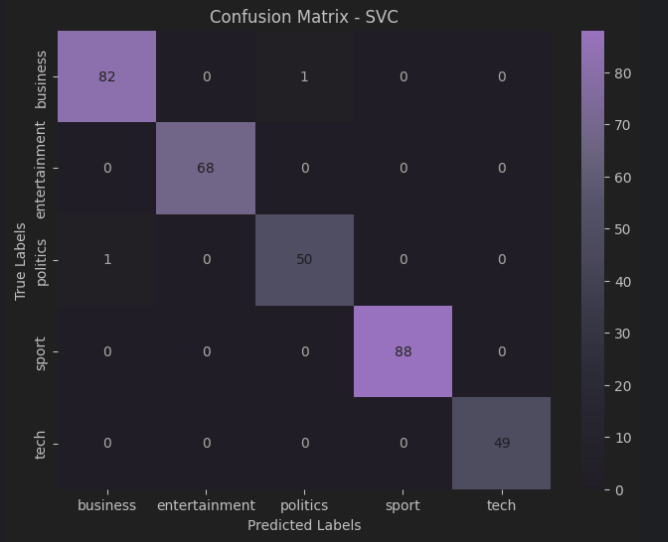

In [20]:
Image("SVC.png")

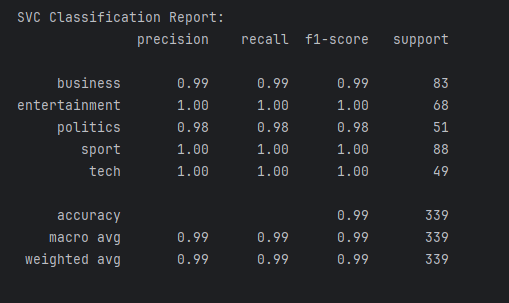

In [21]:
Image("SVCResult.png")

Result:

Logistic Regression:
- Accuracy: 98%
- Highlights: Performs exceptionally well with high F1 scores and recall, especially excelling in the entertainment class with perfect recall (1.00).
- Strengths: Accurate and consistent classification across business, sport, and tech topics.

Random Forest:
- Accuracy: 97%
- Highlights: Strong performance, particularly in the sport and entertainment classes with perfect recall (1.00).
- Strengths: Stable metrics, though slightly less precise than Logistic Regression.

Naive Bayes:
- Accuracy: 96%
- Highlights: High recall and precision, particularly in the sport class (recall and F1-score both at 1.00).
- Strengths: Strong performance in entertainment and sport classes, with slightly lower results for business and tech compared to other models.

SVC:
- Accuracy: 99%
- Highlights: Outstanding overall performance with perfect recall (1.00) for entertainment, tech, and sport. Business achieves 0.99 recall and F1-score.
- Strengths: Most reliable and robust model, excelling in all topics with minimal false negatives. Slightly lower recall for politics (0.98) still reflects excellent classification.

Choose the best model, which is SVC, to make predictions on the test set

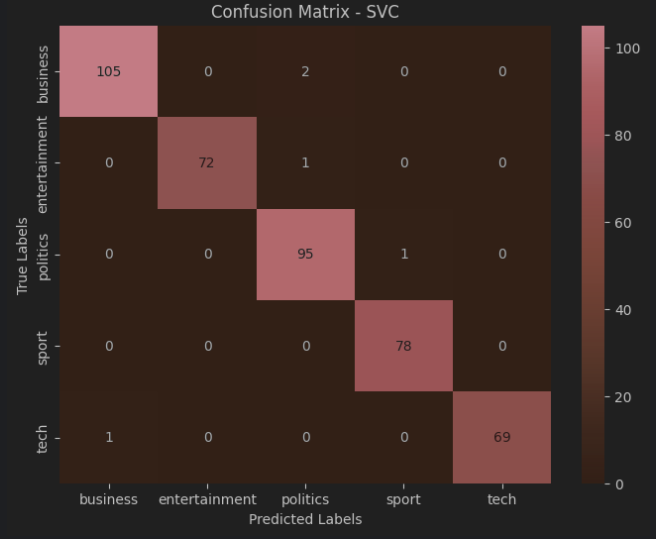

In [4]:
Image("SVCTraining.png")

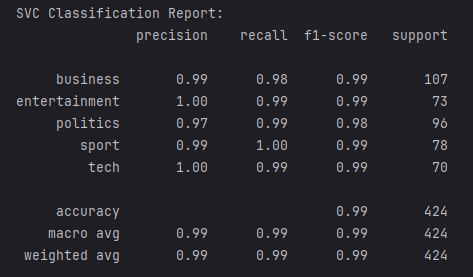

In [5]:
Image("SVCTrainingResult.png")

RESULT:

SVC Classification Report:

- Accuracy: The model achieves an outstanding accuracy of 99%, demonstrating excellent overall performance.
- Precision, Recall, F1-Score: High scores across all classes, with entertainment and tech achieving perfect precision and recall.
- Best Performance: The sport class has perfect recall (1.00), and business shows strong precision (0.99).
- Summary: The model performs excellently in classifying topics with a consistent and reliable classification ability across all categories.